# Case I: Coronary Heart Disease<br>
MatiUllah Khan<br>
Last edited: 02.02.2018 <br>
Cognitive Systems for Health Technology Applications <br>
Helsinki Metropolia University of Applied Sciences <br>

# 1. Objectives
Our obejectices emphasis on learning, preprocessing of the given data, furthermore predicting the people may have coronary heart disease.

# 2. Required libraries
We include the necessary libraries for the pre-processing, and plotting of the given data.

In [90]:
# Required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
import keras

import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
% matplotlib inline

# 3. Data description and preprocessing

1. Combining four different databases.
2. Some databases like Switzerland and Long Beach datasets have many missing data values. 
3. Here replacing the missing data with mean values of the column.
4. Better results achieved using only cleveland and hungarian dataset.

In [91]:
colnames = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'diagnose']

# Processed data
# **************
pCleveland = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', na_values='?', names=colnames)
pHungarian = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data', na_values='?', names=colnames)

# Preprocessing steps:

1. By combining datasets
2. By replacing the missing values
3. By separating the "label" from the data
4. By scaling the data
5. By dividing the data into training and validation i,e. testing data

In [92]:
# Combining datasets
# ******************
datas = [pCleveland, pHungarian]
data = pd.concat(datas)

# Replace missing data with mean of the column
# ********************************************
data = data.where(~np.isnan(data), data.mean(), axis='columns')

# Transfroming diagnosis colums to be true or false 
# *************************************************
labels = (data['diagnose'] > 0).values

# Dropping diagnosis column from the data
# ********************************************
data = data.drop(['diagnose'], axis=1)
columns = ['age', 'sex', 'cp', 'trestbps', 
           'chol', 'fbs', 'restecg', 'thalach', 
           'exang', 'oldpeak', 'slope', 'ca', 'thal']
data = data[columns].values

# Scaling dataset
# ***************
min_max_scaler = preprocessing.MinMaxScaler()
data_minmax = min_max_scaler.fit_transform(data)

# Dividing data to train i.e.testing set
# **************************************
x_train, x_test, y_train, y_test = train_test_split(
    data_minmax, labels, test_size=0.36)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((382, 13), (215, 13), (382,), (215,))

# 4. Modeling and compilation

1. To test the the model with multiple amount of hidden layers.
2. Resulted in least overfitting with only 1 hidden layer.
3. To test with different activation functions (in the first layer).
4. Using 'relu' seems to work as "the best".
5. Using other activation functions model usually gave the underfitting results.

In [93]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_shape=(13,), activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________



# 5. Training and Validation

1. Taking training batch_size = 100 batches gives best results  
2. Number of epochs = 15 were enough to train the model
3. Beyond this range the model started to overfit

In [94]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=100, verbose = 0, validation_data=(x_test,y_test))

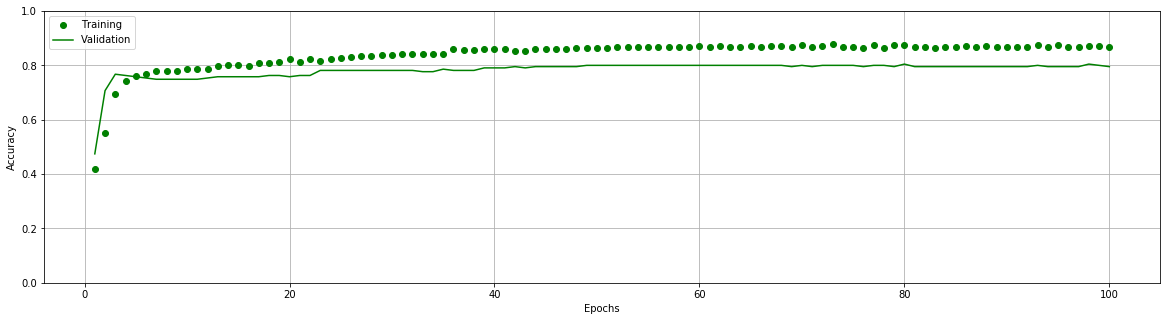

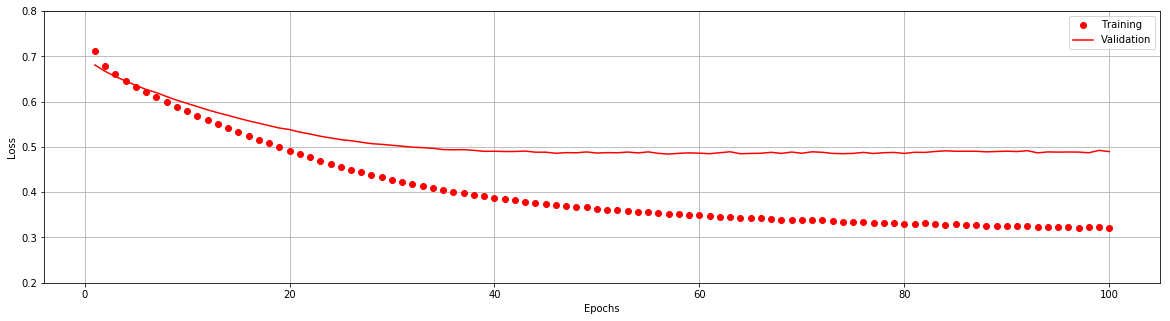

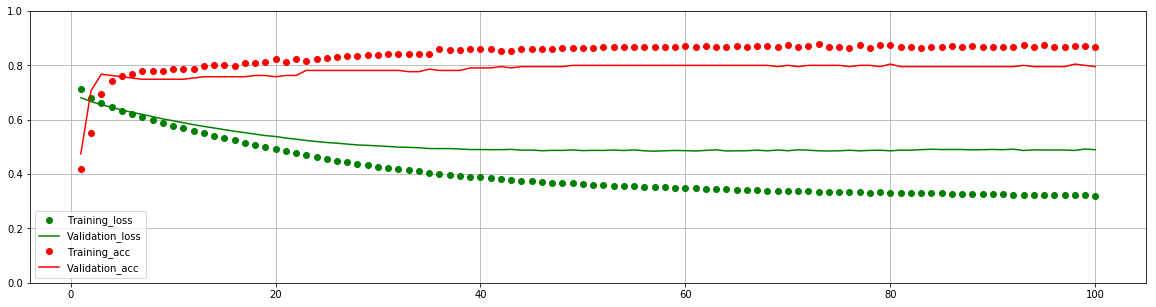

In [95]:
# Plot the results
acc = hist.history['acc']
epochs = range(1, len(acc) + 1)
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Accuracy plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, acc, 'go', label='Training')
plt.plot(epochs, val_acc, 'g', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, loss, 'ro', label='Training')
plt.plot(epochs, val_loss, 'r', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0.2, 0.8])
plt.grid()
plt.legend()
plt.show()

# Combined Accuracy and Loss plots
plt.figure(figsize = (20, 5))
plt.plot(epochs, loss, 'go', label='Training_loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation_loss')
plt.plot(epochs, acc, 'ro', label='Training_acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation_acc')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

# 6. Evaluation

By choosing 20 epochs, testing with a a overfitted model can be avoid 

In [112]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_shape=(13,), activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
hist = model.fit(x_train, y_train, epochs=20, batch_size=100, verbose = 0, validation_data=(x_test,y_test))

score = model.evaluate(x_test, y_test, batch_size=100)
print(score)
score

110/110 [==============================] - 0s 55us/step
[0.5600973015481775, 0.82727271318435669]


[0.5600973015481775, 0.82727271318435669]

#  7. Results and Discussion

1. Accuracy nearly 80%, while best accuracy 83 % was achieved based on size of the datasets.
2. With more datasets higher accuracy nearly 90% accuracy  can be achieved.

# 8. Conclusions

Using Keras facilitates modeling and traning. Preprocessing data and missing data values is a challenging part.

In [97]:
# Check the versions
print('numpy:', np.__version__)
print('pandas:', pd.__version__)
print('sklearn:', sk.__version__)
print('keras:', keras.__version__)

numpy: 1.12.1
pandas: 0.22.0
sklearn: 0.19.1
keras: 2.1.2


In [98]:
# location of the dataset
filename = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

# column names for the data
colnames = ['age','sex','cp','tresbps','chol',
            'fbs','restecg','thalach','exang',
            'oldpeak','slope','ca','thal','num']

# read data to data frame
df = pd.read_csv(filename, 
                 names = colnames, 
                 na_values = '?')

In [99]:
# Calculate descriptive statistics
df.describe()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [100]:
# Check how many missing values are in each column
np.sum(np.isnan(df))

age        0
sex        0
cp         0
tresbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         4
thal       2
num        0
dtype: int64

In [101]:
# Replace the missing values with column mean values
df = df.where(~np.isnan(df), df.mean(), axis='columns')

In [102]:
# Calculate the labels:
# 0 = healthy, 1 = disease
labels = (df['num'] > 0).values

In [103]:
# Select the columns for training
columns = ['age', 'sex', 'cp', 'tresbps', 
           'chol', 'fbs', 'restecg', 'thalach', 
           'exang', 'oldpeak', 'slope', 'ca', 'thal'] # Leaving out angiography data ==> , 'ca', 'thal']

# Convert into numerical array (np.array)
data = df[columns].values

In [104]:
# Check the number of samples and attributes
data.shape

(303, 13)

In [105]:
# Scale the data using min_max_scaler
# More details, check: http://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range
min_max_scaler = preprocessing.MinMaxScaler()
data_minmax = min_max_scaler.fit_transform(data)
data_minmax

array([[ 0.70833333,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.75      ],
       [ 0.79166667,  1.        ,  1.        , ...,  0.5       ,
         1.        ,  0.        ],
       [ 0.79166667,  1.        ,  1.        , ...,  0.5       ,
         0.66666667,  1.        ],
       ..., 
       [ 0.58333333,  1.        ,  1.        , ...,  0.5       ,
         0.33333333,  1.        ],
       [ 0.58333333,  0.        ,  0.33333333, ...,  0.5       ,
         0.33333333,  0.        ],
       [ 0.1875    ,  1.        ,  0.66666667, ...,  0.        ,
         0.22408027,  0.        ]])

In [106]:
# Check what were the scaler values
min_max_scaler.scale_

array([ 0.02083333,  1.        ,  0.33333333,  0.00943396,  0.00228311,
        1.        ,  0.5       ,  0.00763359,  1.        ,  0.16129032,
        0.5       ,  0.33333333,  0.25      ])

In [107]:
# Check the minimum values
min_max_scaler.min_

array([-0.60416667,  0.        , -0.33333333, -0.88679245, -0.28767123,
        0.        ,  0.        , -0.54198473,  0.        ,  0.        ,
       -0.5       ,  0.        , -0.75      ])

In [108]:

# Calculate the mean values of the scaled dataset
data_minmax.mean(axis = 0)

array([ 0.529978  ,  0.67986799,  0.71947195,  0.35556386,  0.27555495,
        0.14851485,  0.4950495 ,  0.60005543,  0.32673267,  0.16767806,
        0.30033003,  0.22408027,  0.43355482])

In [109]:
# Next we are going to split the data into train and test sets.
# For more details, check:
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

In [110]:

# Split the data into train and test sets, leave 36% of the data to testset
x_train, x_test, y_train, y_test = train_test_split(
    data_minmax, labels, test_size=0.36)

# Check the sizes of the variables
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((193, 13), (110, 13), (193,), (110,))

In [ ]:
# Next we build and train the model.
# For more details, check:
# https://keras.io/getting-started/sequential-model-guide/

model = []
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_dim = 13)) 
# input_dim = 13 
# if angiographic data is included
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

# N = number of epochs
N = 100
h = model.fit(x_train, y_train,
              verbose = 0, 
              epochs = N,
              batch_size = 128,
              validation_data=(x_test, y_test))

In [ ]:
# Plot the results

epochs = range(1, N + 1)
acc = h.history['acc']
val_acc = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']

# Accuracy plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, loss, 'bo', label='Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0.2, 0.8])
plt.grid()
plt.legend()
plt.show()

score = model.evaluate(x_test, y_test, batch_size = 128)
score